# A/B Testing
A/B tests are used to test changes on a web page by running an experiment where a control group sees the old version, while the experiment group sees the new version. A metric is then chosen to measure the level of engagement from users in each group. 

A/B testing is very much like hypothesis testing with the following hypotheses:
* Null Hypothesis: The new version is no better, or even worse, than the old version
* Alternative Hypothesis: The new version is better than the old version

A/B testing also has its drawbacks. It can help you compare two options, but it can't tell you about an option you haven’t considered. It can also produce bias results when tested on existing users, due to factors like change aversion and novelty effect.

* **Change Aversion:** Existing users may give an unfair advantage to the old version, simply because they are unhappy with change, even if it’s ultimately for the better.

* **Novelty Effect:** Existing users may give an unfair advantage to the new version, because they’re excited or drawn to the change, even if it isn’t any better in the long run.


## A/B Testing Example: Average CTR
In the following example we will do a A/B test with a company named *Audacity* to test the effect of a change in their landing website. For this we will use the CTR (Click through rate) metric which is defined as

CTR: # clicks by unique users / # views by unique users

Our hypothesis is as follows:

Our alternative hypothesis is what we want to prove to be true, in this case, that the new homepage design has a higher click through rate than the old homepage design. 

And the null hypothesis is what we assume to be true before analyzing data, which is that the new homepage design has a click through rate that is less than or equal to that of the old homepage design.

$$H_0: CRT_n \leq CRT_o $$ 
$$H_1: CRT_n \gt CRT_o $$ 

Or written in another way:

$$H_0: CRT_n - CRT_o \leq 0 $$ 
$$H_1: CRT_n - CRT_o \gt 0 $$ 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [2]:
! wget 'https://raw.githubusercontent.com/xinghuang-gao/a_b_testing_webpage_conversion/master/homepage_actions.csv'

--2022-05-21 11:54:11--  https://raw.githubusercontent.com/xinghuang-gao/a_b_testing_webpage_conversion/master/homepage_actions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398494 (389K) [text/plain]
Saving to: ‘homepage_actions.csv’

homepage_actions.cs 100%[===================>] 389.15K   153KB/s    in 2.5s    

2022-05-21 11:54:25 (153 KB/s) - ‘homepage_actions.csv’ saved [398494/398494]



In [3]:
df =pd.read_csv('homepage_actions.csv')

In [4]:
experiment = df[df['group']=='experiment']
experiment = experiment.reset_index()

In [5]:
control = df[df['group']=='control']
control = control.reset_index()

In [6]:
experiment_unique_views = experiment[experiment['action'] == 'view']['id'].nunique()
experiment_unique_clicks = experiment[experiment['action'] == 'click']['id'].nunique()

experiment_ctr = experiment_unique_clicks / experiment_unique_views
experiment_ctr

0.3097463284379172

In [7]:
control_unique_views = control[control['action'] == 'view']['id'].nunique()
control_unique_clicks = control[control['action'] == 'click']['id'].nunique()

control_ctr = control_unique_clicks / control_unique_views
control_ctr

0.2797118847539016

In [8]:
diff_obs = experiment_ctr - control_ctr
diff_obs

0.030034443684015644

To test the significance of our result, we will do some bootstraping of the previous experiment.

In [9]:
#experiment_crt_bootstrap = []
#control_crt_bootstrap = []
diff = []

for i in range(10000):
    df_sample = df.sample(df.shape[0], replace=True)
    experiment = df_sample[df_sample['group']=='experiment']
    control = df_sample[df_sample['group']=='control']

    experiment_unique_views = experiment[experiment['action'] == 'view']['id'].nunique()
    experiment_unique_clicks = experiment[experiment['action'] == 'click']['id'].nunique()

    experiment_ctr = experiment_unique_clicks / experiment_unique_views
    #experiment_crt_bootstrap.append(experiment_ctr)
    
    control_unique_views = control[control['action'] == 'view']['id'].nunique()
    control_unique_clicks = control[control['action'] == 'click']['id'].nunique()

    control_ctr = control_unique_clicks / control_unique_views
    #control_crt_bootstrap.append(control_ctr)
    diff.append(experiment_ctr - control_ctr)

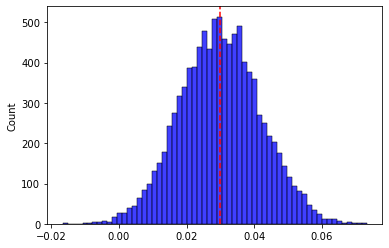

In [10]:
sns.histplot(diff, color='blue')
plt.axvline(x=diff_obs, color='red', linestyle='--')
plt.show()

In [11]:
std = np.std(diff)
null = np.random.normal(0.0, std, df.shape[0])

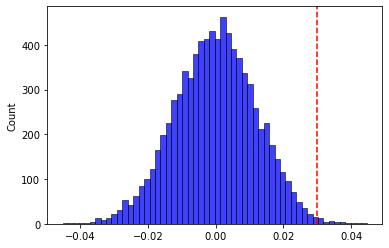

In [12]:
sns.histplot(null, color='blue')
plt.axvline(x=diff_obs, color='red', linestyle='--')
plt.show()

In [13]:
p_enroll = (np.array(null)>diff_obs).mean()
p_enroll

0.004885197850512946

From this results we see that our p-value is very small (less than 0.01) which confirm that our statistic is unlikly to come from the null hypothesis, therefore we can reject the null.

## A/B Testing Example: Multiple metrics
The second change Audacity is A/B testing is a more career focused description on a course overview page. They hope that this change may encourage more users to enroll and complete this course. In this experiment, we’re going to analyze the following metrics:

* **Enrollment Rate:** Click through rate for the Enroll button the course overview page
* **Average Reading Duration:** Average number of seconds spent on the course overview page
* **Average Classroom Time:** Average number of days spent in the classroom for students enrolled in the course
* **Completion Rate:** Course completion rate for students enrolled in the course

In [14]:
! wget 'https://raw.githubusercontent.com/xinghuang-gao/a_b_testing_webpage_conversion/master/course_page_actions.csv'

--2022-05-21 11:55:18--  https://raw.githubusercontent.com/xinghuang-gao/a_b_testing_webpage_conversion/master/course_page_actions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274203 (268K) [text/plain]
Saving to: ‘course_page_actions.csv’

course_page_actions 100%[===================>] 267.78K  51.6KB/s    in 5.2s    

2022-05-21 11:55:25 (51.6 KB/s) - ‘course_page_actions.csv’ saved [274203/274203]



In [15]:
df =pd.read_csv('course_page_actions.csv')

### Average Reading Duration
Average number of seconds spent on the course overview page

In [16]:
reading_times = df[df['action'] == 'view'].groupby(['id', 'group']).mean()
reading_times = reading_times.reset_index()
reading_times

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097
...,...,...,...
3226,936970,experiment,8.178883
3227,936988,control,138.850240
3228,937001,control,117.341754
3229,937035,experiment,38.500533


In [17]:
experiment = reading_times[reading_times['group'] == 'experiment']
control = reading_times[reading_times['group'] == 'control']

In [18]:
experiment_mean = experiment['duration'].mean()
control_mean = control['duration'].mean()
diff_obs = experiment_mean - control_mean
diff_obs

15.934470040394956

In [19]:
diff = []

for i in range(10000):
    df_bootstrap = df.sample(df.shape[0], replace=True)
    reading_times = df_bootstrap[df_bootstrap['action'] == 'view'].groupby(['id', 'group']).mean()
    reading_times = reading_times.reset_index()
    
    experiment = reading_times[reading_times['group'] == 'experiment']
    control = reading_times[reading_times['group'] == 'control']
    
    experiment_mean = experiment['duration'].mean()
    control_mean = control['duration'].mean()
    
    diff.append(experiment_mean - control_mean)

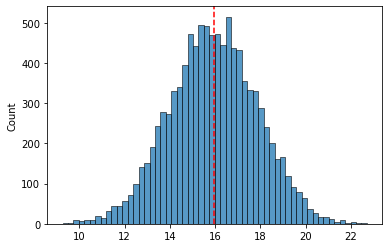

In [20]:
sns.histplot(diff)
plt.axvline(x=diff_obs, color='red', linestyle='--')
plt.show()

In [21]:
null = np.random.normal(0.0, np.std(diff), df.shape[0])

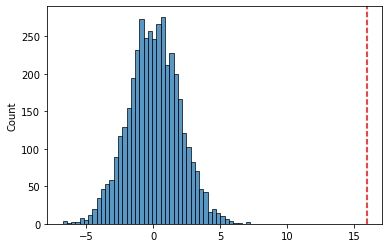

In [22]:
sns.histplot(null)
plt.axvline(x=diff_obs, color='red', linestyle='--')
plt.show()

In [23]:
p_reading = (np.array(null)>diff_obs).mean()
p_reading

0.0

We can see that our p-value is less than 0.01 or is very far away from our null distribution, therefore we can reject the null hypothesis.

## Average Classroom Time
Average number of days spent in the classroom for students enrolled in the course

In [24]:
! wget 'https://raw.githubusercontent.com/xinghuang-gao/a_b_testing_webpage_conversion/master/classroom_actions.csv'

--2022-05-21 11:56:20--  https://raw.githubusercontent.com/xinghuang-gao/a_b_testing_webpage_conversion/master/classroom_actions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200883 (196K) [text/plain]
Saving to: ‘classroom_actions.csv’

classroom_actions.c 100%[===================>] 196.17K  61.0KB/s    in 3.2s    

2022-05-21 11:56:28 (61.0 KB/s) - ‘classroom_actions.csv’ saved [200883/200883]



In [25]:
df = pd.read_csv('classroom_actions.csv')

In [26]:
df

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False
...,...,...,...,...,...
3824,2016-01-19 09:26:08.197754,364453,experiment,63,False
3825,2016-01-19 13:03:23.000822,519239,control,87,True
3826,2016-01-19 13:57:27.787897,508316,experiment,103,True
3827,2016-01-19 14:54:40.124679,244124,control,73,False


In [27]:
classroom_times = df.groupby(['id', 'group']).mean()
classroom_times = classroom_times.reset_index()
#classroom_times['duration_days'] = classroom_times['duration']#/(60*60*24)

In [28]:
experiment = classroom_times[classroom_times['group'] == 'experiment']
control = classroom_times[classroom_times['group'] == 'control']

In [29]:
experiment_mean = experiment['total_days'].mean()
control_mean = control['total_days'].mean()
diff_obs = experiment_mean - control_mean
diff_obs

1.3026031488719099

In [30]:
diff = []

for i in range(10000):
    df_bootstrap = df.sample(df.shape[0], replace=True)
    classroom_times = df_bootstrap.groupby(['id', 'group']).mean()
    classroom_times = classroom_times.reset_index()
    
    experiment = classroom_times[classroom_times['group'] == 'experiment']
    control = classroom_times[classroom_times['group'] == 'control']
    
    experiment_mean = experiment['total_days'].mean()
    control_mean = control['total_days'].mean()
    
    diff.append(experiment_mean - control_mean)

In [31]:
np.mean(diff)

1.3009047774828644

In [32]:
null = np.random.normal(0.0, np.std(diff), df.shape[0])

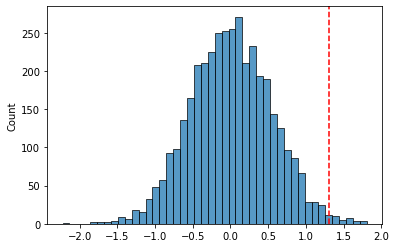

In [33]:
sns.histplot(null)
plt.axvline(x=diff_obs, color='red', linestyle='--')
plt.show()

In [34]:
p_classroom = (np.array(null)>diff_obs).mean()
p_classroom

0.009401932619482894

The p-value obtained shows that we can reject the null hypothesis for a $\alpha$ value of 0.01.

### Completion Rate
Course completion rate for students enrolled in the course

In [35]:
experiment = df[df['group']=='experiment']
control = df[df['group']=='control']

In [36]:
#experiment_cr = experiment[experiment['completed']==True]['id'].nunique() / experiment['id'].nunique()
experiment_cr = experiment['completed'].mean()

experiment_cr

0.3935334872979215

In [37]:
#control_cr = control[control['completed']==True]['id'].nunique() / control['id'].nunique()
control_cr = control['completed'].mean()
control_cr

0.3719951923076923

In [38]:
diff_obs = experiment_cr - control_cr
diff_obs

0.02153829499022919

In [39]:
diff = []

for i in range(10000):
    df_bootstrap = df.sample(df.shape[0], replace=True)
    experiment = df_bootstrap[df_bootstrap['group']=='experiment']
    control = df_bootstrap[df_bootstrap['group']=='control']
    
    #experiment_cr = experiment[experiment['completed']==True]['id'].nunique() / experiment['id'].nunique()
    #control_cr = control[control['completed']==True]['id'].nunique() / control['id'].nunique()
    experiment_cr = experiment['completed'].mean()
    control_cr = control['completed'].mean()

    diff.append(experiment_cr - control_cr)

In [40]:
null = np.random.normal(0.0, np.std(diff), df.shape[0])

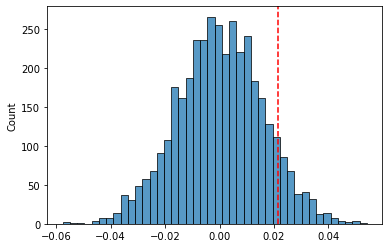

In [41]:
sns.histplot(null)
plt.axvline(x=diff_obs, color='red', linestyle='--')
plt.show()

In [42]:
p_completion = (np.array(null)>diff_obs).mean()
p_completion

0.08696787673021676

The p-value obtained here shows that we can't reject the null hypothesis or there's no statistical significance on our results.

## Summary:
The following table shows the results obtained before.

In [54]:
p_val = np.array([p_enroll, p_reading, p_classroom, p_completion])
names = ['enrollment', 'reading_duration', 'classroom_time', 'completion_rate']

In [55]:
p_df = pd.DataFrame(names, columns=['names'])
p_df['p_val'] = p_val

In [57]:
alpha = 0.01

In [60]:
p_df['significative'] = p_df['p_val']<alpha

In [61]:
p_df

,names,p_val,significative
0,enrollment,0.004885,True
1,reading_duration,0.000000,True
2,classroom_time,0.009402,True
3,completion_rate,0.086968,False


## Bonferroni Correction
The Bonferroni Correction is one way we could handle experiments with multiple tests, or metrics in this case. To compute the new bonferroni correct alpha value, we need to divide the original alpha value by the number of tests.

In [64]:
p_df = p_df.drop(columns=['significative'])

In [66]:
p_df['significative-Benferroni'] = p_df['p_val']<(alpha/4)

In [68]:
p_df

,names,p_val,significative-Benferroni
0,enrollment,0.004885,False
1,reading_duration,0.000000,True
2,classroom_time,0.009402,False
3,completion_rate,0.086968,False
